## Example: Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scratch.algos.linear import LinearRegression
from scratch.utils.evaluation import *

plt.rcParams["figure.figsize"] = (20, 8)
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
n = 500

df = pd.DataFrame({
    "INT": np.repeat(1, n),
    "X": np.random.normal(loc=0, scale=5.6, size=n),
    "E": np.random.normal(loc=0, scale=1, size=n),
})
df["Y"] = (7.2 * df["INT"]) + (0.41 * df["X"]) + df["E"]

nvalid = int(np.floor(n * 0.2))

dftrain = df.head(n=-nvalid)
dfvalid = df.tail(n=nvalid)

Xtrain = dftrain[["X"]]
ytrain = dftrain.Y.values
Xvalid = dfvalid[["X"]]
yvalid = dfvalid.Y.values

In [3]:
m = LinearRegression(learning_rate=0.01, tol_err=1e-06, max_iters=1000)
m.fit(X=Xtrain, y=ytrain)
yfit = m.predict(X=Xtrain)
yhat = m.predict(X=Xvalid)

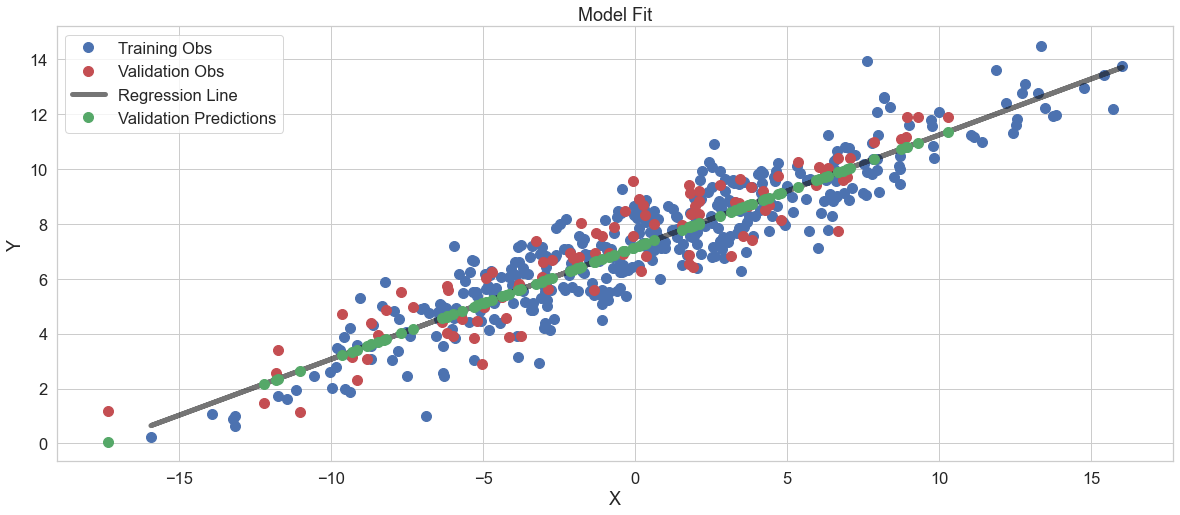

In [4]:
plt.plot(dftrain.X.values, dftrain.Y.values, 'o', c='b', ms=10, label="Training Obs")
plt.plot(dfvalid.X.values, dfvalid.Y.values, 'o', c='r', ms=10, label="Validation Obs")
plt.plot(dftrain.X.values, yfit, '-', c='k', lw=5, alpha=0.6, label="Regression Line")
plt.plot(dfvalid.X.values, yhat, 'o', c='g', ms=10, label="Validation Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Model Fit")
plt.legend()
plt.show()

In [5]:
print("Coefficients:\n{}".format(m.weights))
print("MAE%: {}".format(metric_maep(y=yvalid, yhat=yhat)))
print("RMSE: {}".format(metric_rmse(y=yvalid, yhat=yhat)))

Coefficients:
[0.40882033]
MAE%: 0.1113
RMSE: 0.9461


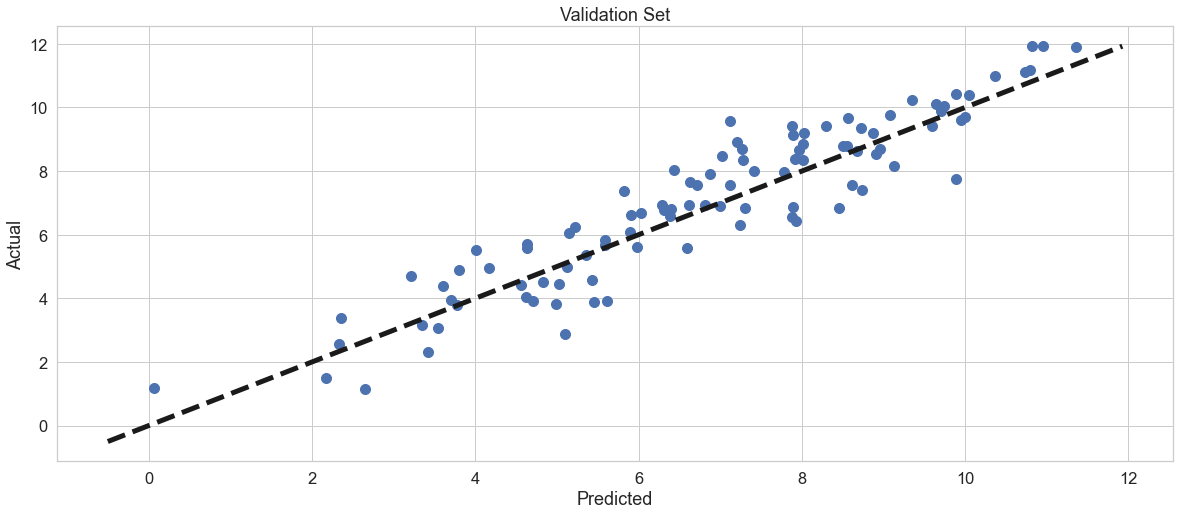

In [6]:
plt.plot(yhat, yvalid, "o", ms=10)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, ls="--", lw=5, c="k")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Set")
plt.show()